In [1]:
# -*- coding: utf-8 -*- 
# This code is written in Python 3.7. To install the required packages, run the following commands:
# pip install pandas numpy matplotlib seaborn scikit-learn sympy
# This code is applicable to the CICIDS2017 dataset. 
# implemented by RandomForestClassifier


import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve
from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    log_loss,
)
# Load the dataset
df = pd.read_csv('/home/ibibers@ads.iu.edu/IDS_Datasets/Combined_datasets/CICIDS2017_combined_dataset.csv')

# Drop duplicates: same observation but multiple occurences
main_df_1 = df.drop_duplicates(keep='first')

# Drop columns that have just one unique value, the model wont learn form columns like this.
one_value = main_df_1.columns[main_df_1.nunique() == 1]
main_df_2 = main_df_1.drop(columns = one_value, axis=1)

# Fill nan values
main_df_2['Flow Bytes/s'] = main_df_2['Flow Bytes/s'].fillna(main_df_2['Flow Bytes/s'].mean())

# Remove leading space character in all feature names
main_df_2.rename(columns=lambda x: x.lstrip(), inplace=True)

sample_df_1 = main_df_2.copy()
# Extract subsample of data
print (" Extract subsample of data: ")
print (sample_df_1['Label'].value_counts())


 Extract subsample of data: 
Label
BENIGN                        2096484
DoS Hulk                       172849
DDoS                           128016
PortScan                        90819
DoS GoldenEye                   10286
FTP-Patator                      5933
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1953
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64


In [2]:
# Label encoding to convert categorical data to numerical data
le = LabelEncoder()
sample_df_1['Label'] = le.fit_transform(sample_df_1['Label'])


In [3]:

dropped_df = ['Label', 'Flow Packets/s', 'Flow Bytes/s']
X = sample_df_1.drop( dropped_df, axis=1) 
y = sample_df_1['Label']  


In [4]:
# Initial train test split set and split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

top_5_features = ['Average Packet Size', 'Packet Length Mean', 'Packet Length Std', 
                  'Packet Length Variance', 'Total Length of Bwd Packets']

top_10_features = ['Average Packet Size', 'Packet Length Mean', 'Packet Length Std', 
                   'Packet Length Variance', 'Total Length of Bwd Packets', 
                   'Subflow Bwd Bytes', 'Avg Bwd Segment Size', 'Bwd Packet Length Mean', 
                   'Total Length of Fwd Packets', 'Subflow Fwd Bytes']


X_train_top5 = X_train[top_5_features]
X_test_top5 = X_test[top_5_features]

X_train_top10 = X_train[top_10_features]
X_test_top10 = X_test[top_10_features]

In [5]:
# def evaluate_model(y_true, y_pred, model_name):
#     """Calculate and return performance metrics as integers."""
#     accuracy = int(accuracy_score(y_true, y_pred) * 100)
#     precision = int(precision_score(y_true, y_pred, average='weighted') * 100)
#     recall = int(recall_score(y_true, y_pred, average='weighted') * 100)
#     f1 = int(f1_score(y_true, y_pred, average='weighted') * 100)

#     print(f"\n{model_name} Metrics:")
#     print(f"Accuracy: {accuracy}%")
#     print(f"Precision: {precision}%")
#     print(f"Recall: {recall}%")
#     print(f"F1 Score: {f1}%")

#     return {
#         'Model': model_name,
#         'Accuracy': accuracy,
#         'Precision': precision,
#         'Recall': recall,
#         'F1 Score': f1,
#     }


def evaluate_model(y_true, y_pred, model_name):
    """Calculate and return performance metrics as floating-point numbers."""
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"\n{model_name} Metrics:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
    }

In [6]:
# ----------------------------------------- RF Classifier for All Features -----------------------------------------

rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)

y_pred_all = rf_model.predict(X_test)



In [7]:

accuracy_all = accuracy_score(y_test, y_pred_all)
print(f"Accuracy for All Features:" , accuracy_all)
print("\nClassification Report for All Features:")
print(classification_report(y_test, y_pred_all, target_names=le.classes_))


Accuracy for All Features: 0.9983011974872789

Classification Report for All Features:
                            precision    recall  f1-score   support

                    BENIGN       1.00      1.00      1.00    419297
                       Bot       0.88      0.79      0.83       391
                      DDoS       1.00      1.00      1.00     25603
             DoS GoldenEye       1.00      0.99      0.99      2057
                  DoS Hulk       1.00      1.00      1.00     34570
          DoS Slowhttptest       0.99      0.99      0.99      1046
             DoS slowloris       1.00      1.00      1.00      1077
               FTP-Patator       1.00      1.00      1.00      1187
                Heartbleed       1.00      1.00      1.00         2
              Infiltration       1.00      0.57      0.73         7
                  PortScan       0.99      0.99      0.99     18164
               SSH-Patator       1.00      1.00      1.00       644
  Web Attack � Brute Force  

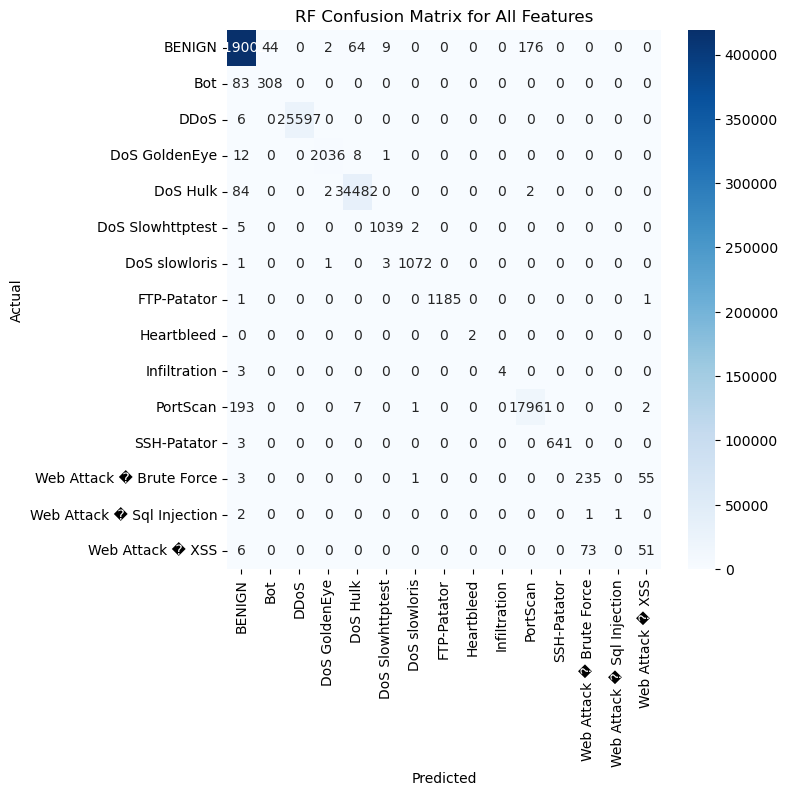

In [8]:
# Confusion matrix
conf_mat_all = confusion_matrix(y_test, y_pred_all)

# Plot confusion matrix
plt.figure(figsize=(7, 7))
sns.heatmap(conf_mat_all, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("RF Confusion Matrix for All Features")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [9]:
# Evaluate the model 
metrics_all = evaluate_model(y_test, y_pred_all, "Random Forest Classifier (All Features)")
print(metrics_all)


Random Forest Classifier (All Features) Metrics:
Accuracy: 0.9983011974872789
Precision: 0.9982762423586199
Recall: 0.9983011974872789
F1 Score: 0.9982830927695588
{'Model': 'Random Forest Classifier (All Features)', 'Accuracy': 0.9983011974872789, 'Precision': 0.9982762423586199, 'Recall': 0.9983011974872789, 'F1 Score': 0.9982830927695588}


In [10]:
# ----------------------------------------- RandomForestClassifier Classifier for Top 5 Features -----------------------------------------
rf_model_top5 = RandomForestClassifier()

rf_model_top5.fit(X_train_top5, y_train)

y_pred_top5 = rf_model_top5.predict(X_test_top5)



In [11]:

accuracy_top5 = accuracy_score(y_test, y_pred_top5)
print("Accuracy for Top 5 Features:", accuracy_top5)
print("\nClassification Report for Top 5 Features:")
print(classification_report(y_test, y_pred_top5, target_names=le.classes_))


Accuracy for Top 5 Features: 0.9895871533263425

Classification Report for Top 5 Features:


/home/ibibers/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ibibers/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                            precision    recall  f1-score   support

                    BENIGN       0.99      1.00      0.99    419297
                       Bot       1.00      0.38      0.55       391
                      DDoS       1.00      1.00      1.00     25603
             DoS GoldenEye       1.00      0.74      0.85      2057
                  DoS Hulk       1.00      0.93      0.96     34570
          DoS Slowhttptest       0.99      0.45      0.62      1046
             DoS slowloris       0.99      0.70      0.82      1077
               FTP-Patator       0.99      0.98      0.99      1187
                Heartbleed       1.00      1.00      1.00         2
              Infiltration       0.00      0.00      0.00         7
                  PortScan       0.98      0.99      0.99     18164
               SSH-Patator       1.00      0.92      0.96       644
  Web Attack � Brute Force       1.00      0.10      0.17       294
Web Attack � Sql Injection       0.00      0.00

/home/ibibers/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


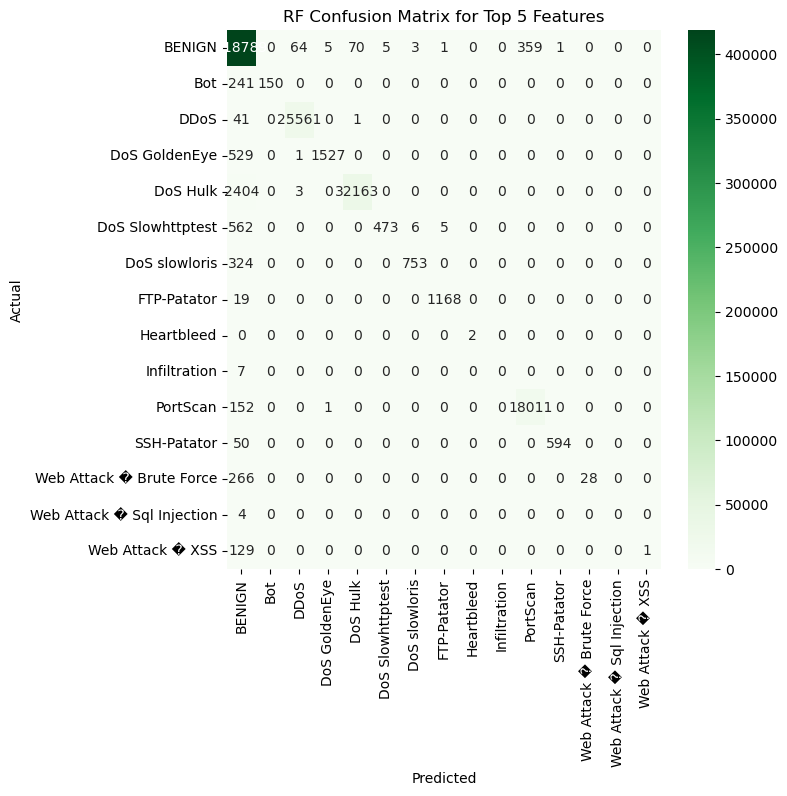

In [12]:

# Confusion matrix
conf_mat_top5 = confusion_matrix(y_test, y_pred_top5)

# Plot confusion matrix
plt.figure(figsize=(7, 7))
sns.heatmap(conf_mat_top5, annot=True, fmt="d", cmap="Greens", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("RF Confusion Matrix for Top 5 Features")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [13]:
# Evaluate the model
metrics_top5 = evaluate_model(y_test, y_pred_top5, "Random Forest  (Top 5 Features)")
print(metrics_top5)



Random Forest  (Top 5 Features) Metrics:
Accuracy: 0.9895871533263425
Precision: 0.9896331389231707
Recall: 0.9895871533263425
F1 Score: 0.9887194451591831
{'Model': 'Random Forest  (Top 5 Features)', 'Accuracy': 0.9895871533263425, 'Precision': 0.9896331389231707, 'Recall': 0.9895871533263425, 'F1 Score': 0.9887194451591831}


/home/ibibers/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
# ----------------------------------------- RandomForestClassifier Classifier for Top 10 Features -----------------------------------------
rf_model_top10 = RandomForestClassifier()

rf_model_top10.fit(X_train_top10, y_train)

y_pred_top10 = rf_model_top10.predict(X_test_top10)


In [15]:

accuracy_top10 = accuracy_score(y_test, y_pred_top10)
print(f"Accuracy for Top 10 Features: {accuracy_top10}")
print("\nClassification Report for Top 10 Features:")
print(classification_report(y_test, y_pred_top10, target_names=le.classes_))


Accuracy for Top 10 Features: 0.9896803198585454

Classification Report for Top 10 Features:


/home/ibibers/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ibibers/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                            precision    recall  f1-score   support

                    BENIGN       0.99      1.00      0.99    419297
                       Bot       1.00      0.39      0.56       391
                      DDoS       1.00      1.00      1.00     25603
             DoS GoldenEye       0.99      0.74      0.85      2057
                  DoS Hulk       1.00      0.93      0.96     34570
          DoS Slowhttptest       0.98      0.46      0.62      1046
             DoS slowloris       0.99      0.70      0.82      1077
               FTP-Patator       0.99      0.98      0.99      1187
                Heartbleed       1.00      0.50      0.67         2
              Infiltration       1.00      0.71      0.83         7
                  PortScan       0.98      0.99      0.99     18164
               SSH-Patator       1.00      0.93      0.96       644
  Web Attack � Brute Force       1.00      0.10      0.17       294
Web Attack � Sql Injection       0.00      0.00

/home/ibibers/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


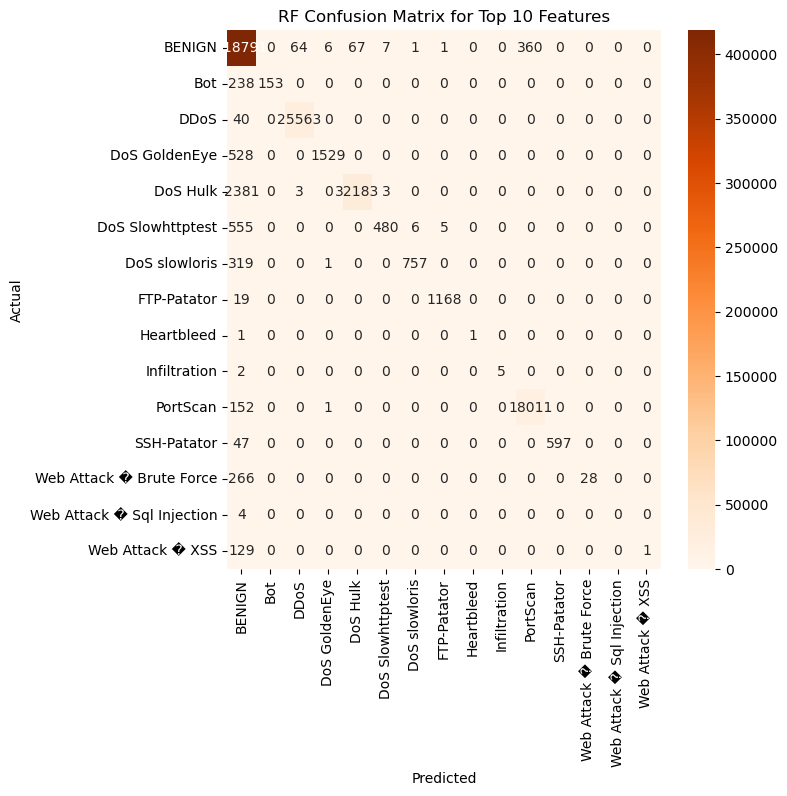

In [16]:

# Confusion matrix
conf_mat_top10 = confusion_matrix(y_test, y_pred_top10)

# Plot confusion matrix
plt.figure(figsize=(7, 7))
sns.heatmap(conf_mat_top10, annot=True, fmt="d", cmap="Oranges", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("RF Confusion Matrix for Top 10 Features")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [17]:
# Evaluate the model
metrics_top10 = evaluate_model(y_test, y_pred_top10, "Random Forest (Top 10 Features)")
print(metrics_top10)


Random Forest (Top 10 Features) Metrics:
Accuracy: 0.9896803198585454
Precision: 0.989728824421799
Recall: 0.9896803198585454
F1 Score: 0.9888322366390795
{'Model': 'Random Forest (Top 10 Features)', 'Accuracy': 0.9896803198585454, 'Precision': 0.989728824421799, 'Recall': 0.9896803198585454, 'F1 Score': 0.9888322366390795}


/home/ibibers/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:

# ----------------------------------------- The summary Metrics for All Models -----------------------------------------
summary = pd.DataFrame([metrics_all, metrics_top5, metrics_top10])
print("\nSummary of Results:")
print(summary)

# Save summary to CSV
summary.to_csv("model_evaluation_summary.csv", index=False)



Summary of Results:
                                     Model  Accuracy  Precision    Recall  \
0  Random Forest Classifier (All Features)  0.998301   0.998276  0.998301   
1          Random Forest  (Top 5 Features)  0.989587   0.989633  0.989587   
2          Random Forest (Top 10 Features)  0.989680   0.989729  0.989680   

   F1 Score  
0  0.998283  
1  0.988719  
2  0.988832  


In [1]:
# -*- coding: utf-8 -*-
# This code is written in Python 3.7. Install the required packages using:
# pip install pandas numpy matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score
)
from sklearn.preprocessing import LabelEncoder
import time

# ---------------------------- Helper Functions ----------------------------
def evaluate_model(y_true, y_pred, model_name):
    """Calculate and return performance metrics."""
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"\n{model_name} Metrics:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
    }


def plot_confusion_matrix(y_true, y_pred, classes, title):
    """Plot and display a confusion matrix."""
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(7, 7))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [2]:

# ---------------------------- Data Preprocessing ----------------------------
# Load the dataset
df = pd.read_csv('/home/ibibers@ads.iu.edu/IDS_Datasets/Combined_datasets/CICIDS2017_combined_dataset.csv')

df = df.drop_duplicates()
df.rename(columns=lambda x: x.lstrip(), inplace=True)
df['Flow Bytes/s'] = df['Flow Bytes/s'].fillna(df['Flow Bytes/s'].mean())

le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])

dropped_cols = ['Label', 'Flow Packets/s', 'Flow Bytes/s']
X = df.drop(columns=dropped_cols, axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [3]:

# ---------------------------- Feature Selection ----------------------------
# Top features selected using Information Gain
IGtop_5_features = ['Average Packet Size', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'Total Length of Bwd Packets']
IGtop_10_features = IGtop_5_features + ['Subflow Bwd Bytes', 'Avg Bwd Segment Size', 'Bwd Packet Length Mean', 'Total Length of Fwd Packets', 'Subflow Fwd Bytes']

# Top features selected using K-best
Kbest_top_5_features = ['Bwd Packet Length Max', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow IAT Max', 'Fwd IAT Std']
Kbest_top_10_features = Kbest_top_5_features + ['Fwd IAT Max', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance']

# Subset data based on feature selection
datasets = {
    "All Features": (X_train, X_test),
    "IG Top 5 Features": (X_train[IGtop_5_features], X_test[IGtop_5_features]),
    "IG Top 10 Features": (X_train[IGtop_10_features], X_test[IGtop_10_features]),
    "KBest Top 5 Features": (X_train[Kbest_top_5_features], X_test[Kbest_top_5_features]),
    "KBest Top 10 Features": (X_train[Kbest_top_10_features], X_test[Kbest_top_10_features]),
}



----- Training Random Forest Classifier for All Features -----

Random Forest (All Features) Metrics:
Accuracy: 0.9983091265538493
Precision: 0.9982810369549128
Recall: 0.9983091265538493
F1 Score: 0.9982898436376427


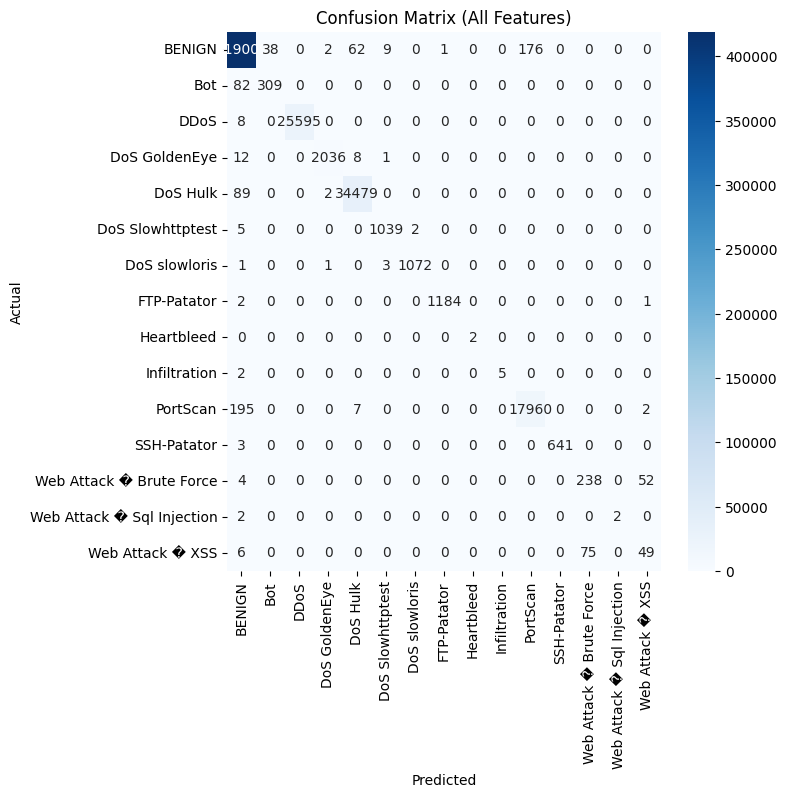


----- Training Random Forest Classifier for IG Top 5 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Random Forest (IG Top 5 Features) Metrics:
Accuracy: 0.9895911178596277
Precision: 0.9896348408903383
Recall: 0.9895911178596277
F1 Score: 0.988723652058381


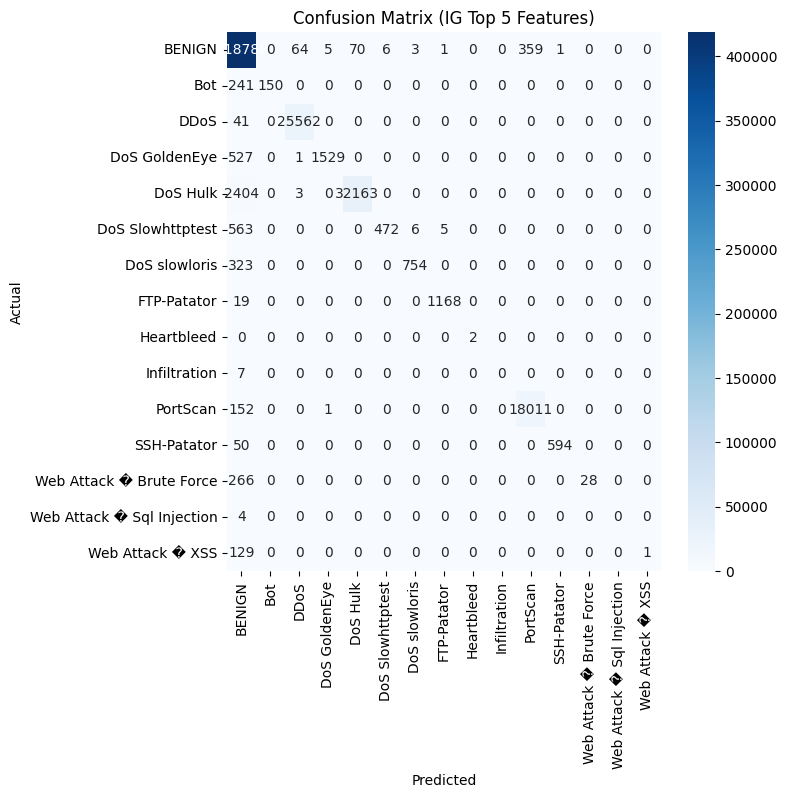


----- Training Random Forest Classifier for IG Top 10 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Random Forest (IG Top 10 Features) Metrics:
Accuracy: 0.9896902311917585
Precision: 0.9897407270794448
Recall: 0.9896902311917585
F1 Score: 0.9888421755895183


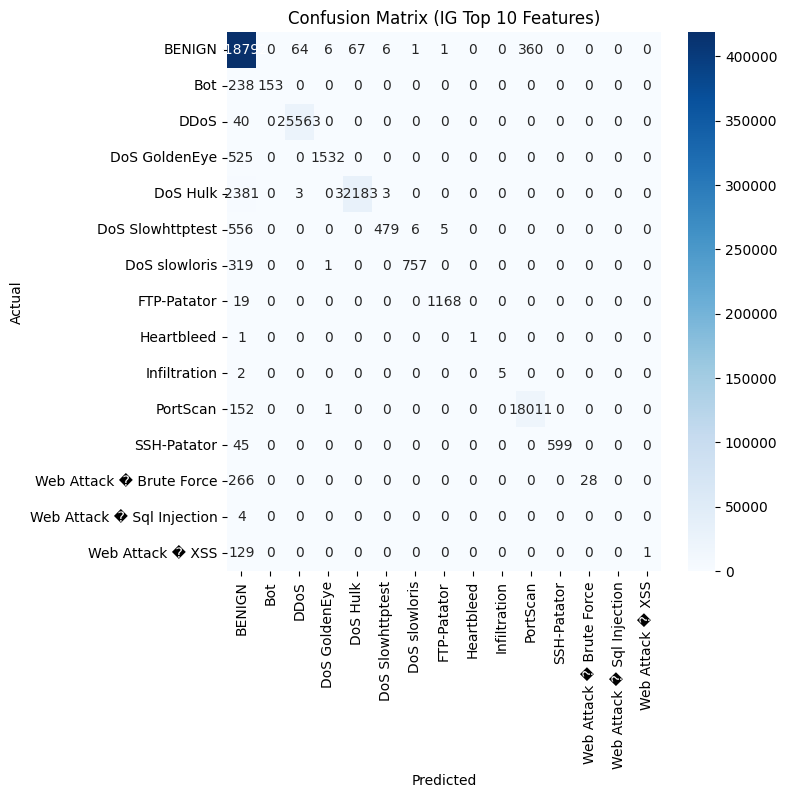


----- Training Random Forest Classifier for KBest Top 5 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Random Forest (KBest Top 5 Features) Metrics:
Accuracy: 0.9629197201832407
Precision: 0.9614580233257588
Recall: 0.9629197201832407
F1 Score: 0.9619994168757967


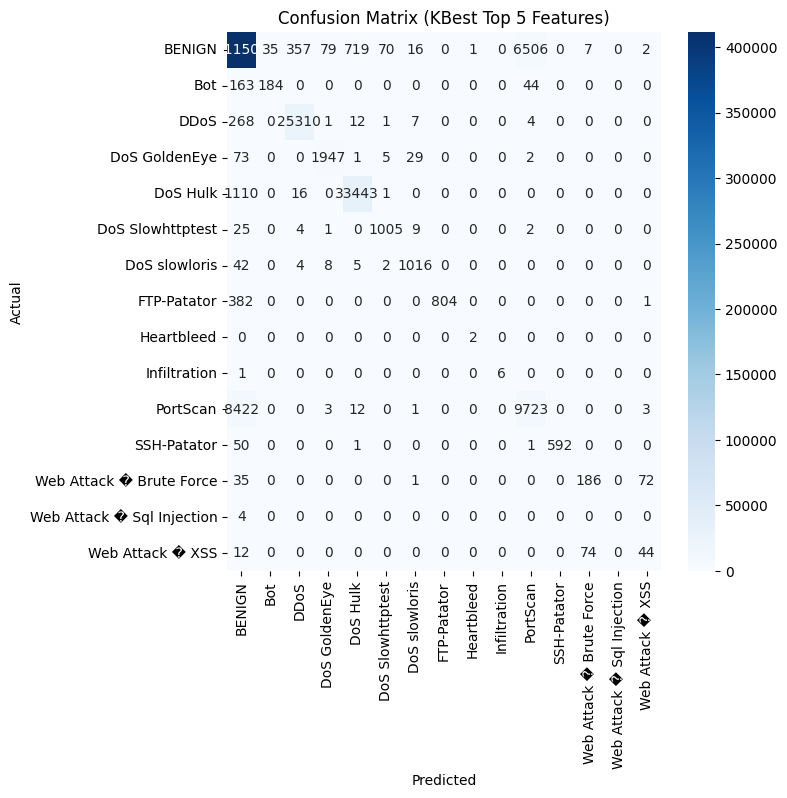


----- Training Random Forest Classifier for KBest Top 10 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Random Forest (KBest Top 10 Features) Metrics:
Accuracy: 0.9966202353743412
Precision: 0.9965445690513782
Recall: 0.9966202353743412
F1 Score: 0.9965402980899083


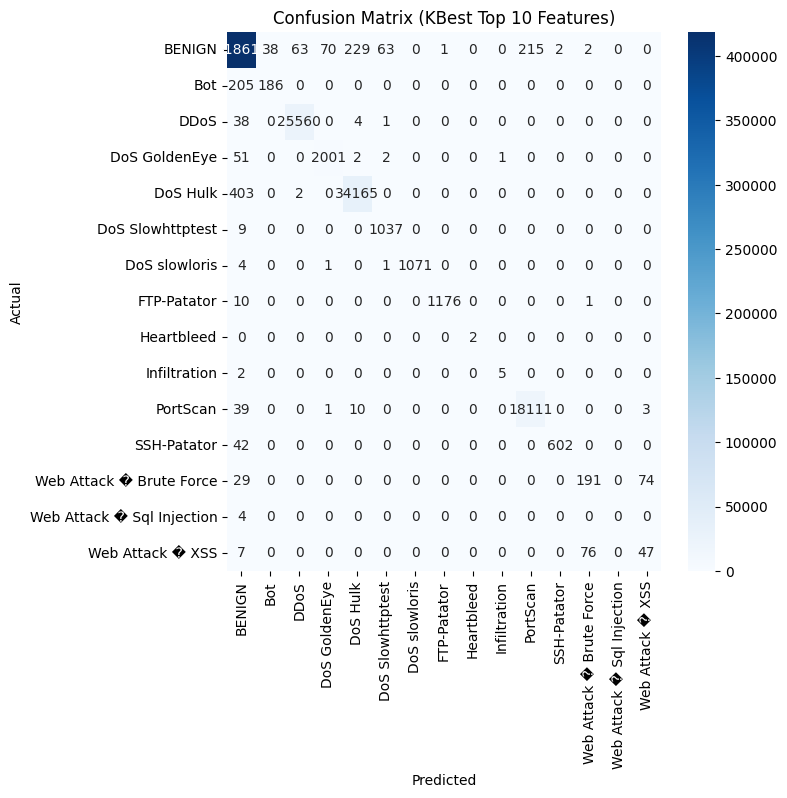

In [4]:

# ---------------------------- Model Training and Evaluation ----------------------------
results = []
for name, (X_tr, X_te) in datasets.items():
    print(f"\n----- Training Random Forest Classifier for {name} -----")

    start_time = time.time()

    model = RandomForestClassifier(random_state=42, n_estimators=100)
    model.fit(X_tr, y_train)

    train_end_time = time.time()

    y_pred = model.predict(X_te)

    pred_end_time = time.time()

    metrics = evaluate_model(y_test, y_pred, f"Random Forest ({name})")
    metrics['Training Time (s)'] = train_end_time - start_time
    metrics['Prediction Time (s)'] = pred_end_time - train_end_time
    metrics['Total Time (s)'] = pred_end_time - start_time
    results.append(metrics)
    
    plot_confusion_matrix(y_test, y_pred, le.classes_, f"Confusion Matrix ({name})")


In [5]:

# ---------------------------- Summary and Save Results ----------------------------
summary = pd.DataFrame(results)
print("\nSummary of Results:")
print(summary)

summary.to_csv("random_forest_evaluation_summary.csv", index=False)



Summary of Results:
                                   Model  Accuracy  Precision    Recall  \
0           Random Forest (All Features)  0.998309   0.998281  0.998309   
1      Random Forest (IG Top 5 Features)  0.989591   0.989635  0.989591   
2     Random Forest (IG Top 10 Features)  0.989690   0.989741  0.989690   
3   Random Forest (KBest Top 5 Features)  0.962920   0.961458  0.962920   
4  Random Forest (KBest Top 10 Features)  0.996620   0.996545  0.996620   

   F1 Score  Training Time (s)  Prediction Time (s)  Total Time (s)  
0  0.998290         736.573563             8.200980      744.774542  
1  0.988724         280.612788             3.671643      284.284431  
2  0.988842         363.046711             3.621106      366.667817  
3  0.961999         278.487952             5.044542      283.532495  
4  0.996540         419.207595             4.714170      423.921766  
